In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import jieba
from cocoNLP.extractor import extractor
plt.rcParams["font.family"] = 'SimHei'
plt.rcParams["axes.unicode_minus"] = 'False'
plt.rcParams['font.size'] = 15

(366, 4)


,Unnamed: 0,date,headline,content
0,0,2020-01-01,"新年戏曲晚会在京举行,《求是》杂志发表习近平总书记重要文章《坚持和完善中国特色社会主义制度推...",夜幕降临，华灯璀璨。国家大剧院戏剧场内笑语盈盈、欢声阵阵，洋溢着如春的暖意和喜庆的节日气氛。...
1,1,2020-01-02,"习近平签署中央军委2020年1号命令 向全军发布开训动员令,习近平对审计工作作出重要指示强调...",2020年，全军要坚持以习近平新时代中国特色社会主义思想为指导，贯彻习近平强军思想，贯彻新时...
2,2,2020-01-03,习近平主持召开中央财经委员会第六次会议强调 抓好黄河流域生态保护和高质量发展 大力推动成渝地...,中共中央政治局常委、国务院总理、中央财经委员会副主任李克强，中共中央政治局常委、中央书记处书...
3,3,2020-01-04,"只争朝夕 不负韶华 奋进伟大新时代,“不忘初心、牢记使命” 主题教育进行时,江西抚州：问题导...",新年伊始，位于贵州省黔西县易地扶贫安置点的就业培训班早早开课，这里入住了近两万名搬迁群众。2...
4,4,2020-01-05,"《习近平关于中国特色大国外交论述摘编》出版发行,【走进长江经济带】美丽长江我的家,中共中央印...",党的十八大以来，在以习近平同志为核心的党中央坚强领导下，面对国际形势风云变幻，我们开创性推进...


In [3]:
# load and preview the data 
news = pd.read_csv('2020news.csv')
print(news.shape)
news.head()

before:

Unnamed: 0    0
date          0
headline      5
content       1
dtype: int64


,Unnamed: 0,date,headline,content
96,96,2020-04-06,"抓好春耕备耕 扎实推进农业生产,李克强主持召开中央应对新冠肺炎疫情工作领导小组会议 要求持续...",NaN


In [4]:
# deal with missing values - fill the missing content with what is in the headline
index = news[news["content"].isnull()].index
print("before:\n")
print(news.isnull().sum())
news.loc[index].sample(1)

after:

Unnamed: 0    0
date          0
headline      5
content       0
dtype: int64


C:\Users\Dongyu Gong\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,date,headline,content
96,96,2020-04-06,"抓好春耕备耕 扎实推进农业生产,李克强主持召开中央应对新冠肺炎疫情工作领导小组会议 要求持续...","抓好春耕备耕 扎实推进农业生产,李克强主持召开中央应对新冠肺炎疫情工作领导小组会议 要求持续..."


In [5]:
news["content"][index] = news["headline"][index]
print("after:\n")
print(news.isnull().sum())
news.loc[index].sample(1)

,Unnamed: 0,date,headline,content,nonpunc_content
164,164,2020-06-13,【在习近平新时代中国特色社会主义思想指引下——育新机 开新局】为全球产业链供应链稳定注入正能...,在湖南长沙货运中心北站，平均每天都有两列中欧班列鸣笛出发，驶往欧洲。即使在疫情最严重的时候，...,在湖南长沙货运中心北站平均每天都有两列中欧班列鸣笛出发驶往欧洲即使在疫情最严重的时候长沙也没...
289,289,2020-10-16,中共中央政治局召开会议 审议《成渝地区双城经济圈建设规划纲要》 中共中央总书记习近平主持会议...,会议指出，当前我国发展的国内国际环境继续发生深刻复杂变化，推动成渝地区双城经济圈建设，有利于...,会议指出当前我国发展的国内国际环境继续发生深刻复杂变化推动成渝地区双城经济圈建设有利于形成优...
127,127,2020-05-07,"各地全力以赴恢复生产生活秩序,李克强主持召开中央应对新冠肺炎疫情工作领导小组会议 要求总结推...",6日，四川成都东部新区51个重大项目集中开工，涉及产业、基础设施、公共服务设施等多个方面，总...,日四川成都东部新区个重大项目集中开工涉及产业基础设施公共服务设施等多个方面总投资多亿元根据最...
85,85,2020-03-26,"习近平同德国总理通电话,习近平复信世界卫生组织总干事,中共中央 国务院发布《关于全面加强新时...",习近平强调，在中国发生新冠肺炎疫情初期，你向中方表达了慰问和支持，德国政府和各界纷纷伸出援手...,习近平强调在中国发生新冠肺炎疫情初期你向中方表达了慰问和支持德国政府和各界纷纷伸出援手中国人...
23,23,2020-01-24,"同时间赛跑 同历史并进——习近平总书记在2020年春节团拜会上的讲话引发热烈反响,央视快评：...",习近平总书记的重要讲话，是对我国一年来政治经济社会发展的全方位总结，凝聚起团结奋进的磅礴力量...,习近平总书记的重要讲话是对我国一年来政治经济社会发展的全方位总结凝聚起团结奋进的磅礴力量全国...


In [6]:
# remove punctuations and special characters from the text
additional_chinese_punc='，。、【 】 “”：；（）《》‘’{}？！()、%^>℃：.”“^-——=&#@￥'
all_punc=string.punctuation+additional_chinese_punc

def remove_punct_num(text):
    text  = "".join([char for char in str(text) if char not in all_punc])
    text = re.sub('[0-9]+', '', text)
    return text

news["nonpunc_content"] = news["content"].apply(remove_punct_num)
news.sample(5)

,Unnamed: 0,date,headline,content,nonpunc_content,cut
107,107,2020-04-17,中共中央政治局召开会议 分析国内外新冠肺炎疫情防控形势 研究部署抓紧抓实抓细常态化疫情防控工...,4月15日，习近平总书记主持召开中央政治局常委会会议，听取疫情防控工作和当前经济形势的汇报，...,月日习近平总书记主持召开中央政治局常委会会议听取疫情防控工作和当前经济形势的汇报研究当前疫情...,<generator object Tokenizer.cut at 0x000002AA7...
181,181,2020-06-30,习近平在中央政治局第二十一次集体学习时强调 贯彻落实好新时代党的组织路线 不断把党建设得更加...,"中央组织部秘书长胡金旗同志就这个问题进行了讲解，提出了意见和建议。,习近平在主持学习时发表了...",中央组织部秘书长胡金旗同志就这个问题进行了讲解提出了意见和建议习近平在主持学习时发表了讲话他...,<generator object Tokenizer.cut at 0x000002AA7...
79,79,2020-03-20,"习近平同俄罗斯总统通电话,【让党旗在疫情防控斗争第一线高高飘扬】践行初心使命 交出合格答卷,...",习近平指出，这次新冠肺炎疫情来势凶猛，中国必须迎难而上，勇敢应对，因为这不仅关乎中国人民生命...,习近平指出这次新冠肺炎疫情来势凶猛中国必须迎难而上勇敢应对因为这不仅关乎中国人民生命安全和身...,<generator object Tokenizer.cut at 0x000002AA7...
138,138,2020-05-18,"习近平在第73届世界卫生大会视频会议开幕式上致辞,习近平给北京科技大学全体巴基斯坦留学生回信...",习近平在致辞中强调：“在人类抗击新冠肺炎疫情的关键时刻举行这次世卫大会，具有十分重要的意义！...,习近平在致辞中强调在人类抗击新冠肺炎疫情的关键时刻举行这次世卫大会具有十分重要的意义新冠肺炎...,<generator object Tokenizer.cut at 0x000002AA7...
31,31,2020-02-01,"让党旗飘扬在战“疫”一线,李克强考察疫情防控国家重点医疗物资保障调度平台,李克强同欧盟委员会...",在重症病区，广大党员医护工作者用生命去佑护生命，为患者点燃生的希望。在武汉市中心医院病房里，...,在重症病区广大党员医护工作者用生命去佑护生命为患者点燃生的希望在武汉市中心医院病房里呼吸与危...,<generator object Tokenizer.cut at 0x000002AA7...


In [7]:
def cut_word(text):
    word = jieba.cut(text)
    return word
news["cut"] = news["nonpunc_content"].apply(cut_word) 
news.sample(5)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DONGYU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built successfully.


,Unnamed: 0,date,headline,content,nonpunc_content,cut,rm_stopword
350,350,2020-12-16,"习近平同智利总统通电话,习近平同坦桑尼亚总统通电话,习近平同志《论坚持全面依法治国》出版发行...",习近平指出，智利是第一个同新中国建交的拉美大陆国家，中智关系是中国同拉美国家团结合作、互利共...,习近平指出智利是第一个同新中国建交的拉美大陆国家中智关系是中国同拉美国家团结合作互利共赢的典...,<generator object Tokenizer.cut at 0x000002AA7...,"[习近平, 指出, 智利, 第一个, 同新, 中国, 建交, 拉美, 大陆, 国家, 中智,..."
268,268,2020-09-25,习近平对“十四五”规划编制工作网上意见征求活动作出重要指示强调 更好发挥互联网在倾听人民呼声...,为贯彻落实习近平总书记关于“十四五”规划编制工作要开门问策、集思广益，把加强顶层设计和坚持问...,为贯彻落实习近平总书记关于十四五规划编制工作要开门问策集思广益把加强顶层设计和坚持问计于民统...,<generator object Tokenizer.cut at 0x000002AA7...,"[贯彻落实, 习近平, 总书记, 十四五, 规划, 编制工作, 开门, 问策, 集思广益, ..."
7,7,2020-01-08,习近平在“不忘初心、牢记使命”主题教育总结大会上强调 以主题教育为新的起点 持续推动全党不忘...,中共中央政治局常委李克强、栗战书、汪洋、赵乐际、韩正，国家副主席王岐山出席会议，中共中央政治...,中共中央政治局常委李克强栗战书汪洋赵乐际韩正国家副主席王岐山出席会议中共中央政治局常委中央不...,<generator object Tokenizer.cut at 0x000002AA7...,"[中共, 中央政治局常委, 李克强, 栗, 战书, 汪洋, 赵乐际, 韩正, 国家, 副, ..."
212,212,2020-07-31,习近平在中央政治局第二十二次集体学习时强调 统一思想坚定信心鼓足干劲抓紧工作 奋力推进国防和...,军事科学院研究员陈荣弟同志就这个问题进行了讲解，并谈了意见和建议。中央政治局的同志认真听取了...,军事科学院研究员陈荣弟同志就这个问题进行了讲解并谈了意见和建议中央政治局的同志认真听取了他的...,<generator object Tokenizer.cut at 0x000002AA7...,"[军事科学院, 研究员, 陈荣弟, 同志, 问题, 进行, 讲解, 谈, 意见, 建议, 中..."
263,263,2020-09-20,推动“十四五”规划编制顺应人民意愿 符合人民所思所盼 努力创造更美好的生活——习近平总书记在...,习近平总书记在湖南调研期间专门召开这次座谈会。从办好乡村教育到加大产业扶贫力度，从支持小微企...,习近平总书记在湖南调研期间专门召开这次座谈会从办好乡村教育到加大产业扶贫力度从支持小微企业发...,<generator object Tokenizer.cut at 0x000002AA7...,"[习近平, 总书记, 湖南, 调研, 期间, 专门, 召开, 座谈会, 办好, 乡村, 教育..."


In [8]:
# remove stopwords
def get_stopword():
    s = set()
    with open('./stopwords-master/cn_stopwords.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
news["rm_stopword"] = news["cut"].apply(remove_stopword)
news.sample(5)

total words:806625
non-reduplicated words:51334
[('疫情', 6990), ('中国', 5153), ('发展', 5120), ('工作', 3837), ('国家', 3583), ('新', 3399), ('习近平', 3196), ('防控', 3100), ('美国', 2999), ('病例', 2975), ('企业', 2785), ('中', 2632), ('表示', 2351), ('建设', 2268), ('人民', 2247)]


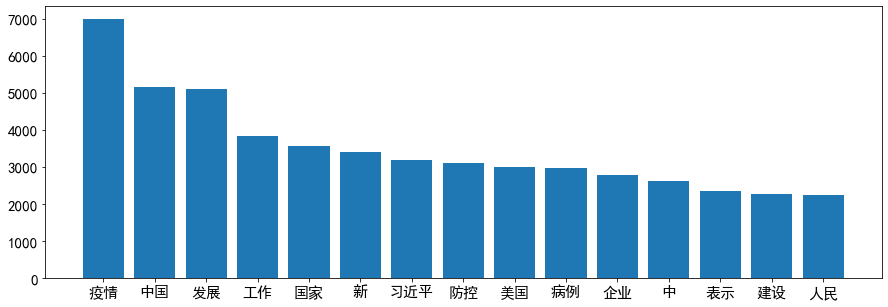

In [9]:
# Visualization
from itertools import chain
from collections import Counter
li_2d = news['rm_stopword'].tolist()
li_1d = list(chain.from_iterable(li_2d))

# for word in li_1d:
#     if (len(word.encode())-len(word))//2 < 2:
#         li_1d.remove(word)

print (f'total words:{len(li_1d)}')
c= Counter(li_1d)
print (f'non-reduplicated words:{len(c)}')
common = c.most_common(15)
print (common)

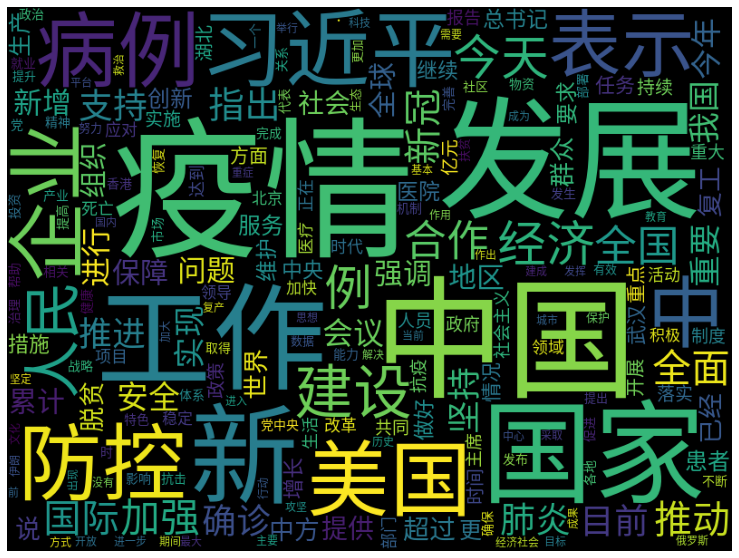

In [10]:
d = dict(common)
plt.figure(figsize=[15, 5])
plt.bar(d.keys(),d.values())
plt.show()

In [11]:
from wordcloud import WordCloud
wc = WordCloud(font_path = './SourceHanSansCN-Regular.otf',width=800,height=600)
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(c)
plt.imshow(img)
plt.axis('off')
plt.savefig('./wordcloud.png')

In [12]:
import pickle
with open('word_list.pkl','wb') as f:
    pickle.dump('li_2d',f)

C:\Users\Dongyu Gong\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,date,headline,content,nonpunc_content,cut,rm_stopword,locations
256,256,2020-09-13,"【走向我们的小康生活】万顷洱海扬清波 生态铺就小康底色,国务院印发《关于实施金融控股公司准入...",正在船上打捞水草的是大理镇的滩地管理员李志贤，她主要负责洱海湖面和滩地垃圾的清理工作，这几年...,正在船上打捞水草的是大理镇的滩地管理员李志贤她主要负责洱海湖面和滩地垃圾的清理工作这几年她亲...,<generator object Tokenizer.cut at 0x000002AA7...,"[正在, 船上, 打捞, 水草, 大理, 镇, 滩地, 管理员, 李志贤, 主要, 负责, ...","[大理', 洱海', 洱海', 洱海', 洱海', 洱海', 洱海', 洱海', 云南', ..."
97,97,2020-04-07,"【让党旗在疫情防控斗争第一线高高飘扬】牢记党旗下的誓言冲锋在前,李克强主持召开国务院常务会议...",4月5日上午，在武汉市肺科医院重症病房，吉林大学第一医院国家医疗队队长，有着22年党龄的吕国...,月日上午在武汉市肺科医院重症病房吉林大学第一医院国家医疗队队长有着年党龄的吕国悦正带领位火线...,<generator object Tokenizer.cut at 0x000002AA7...,"[上午, 武汉市, 肺科, 医院, 重症, 病房, 吉林大学, 第一, 医院, 国家, 医疗...","[武汉市', 新城', 武汉市', 武汉市', 江汉区', 社区', 社区', 社区', 武..."
249,249,2020-09-06,"《习近平关于防范风险挑战、应对突发事件论述摘编》出版发行,彰显开放决心 共享发展成果——习近...",党的十八大以来，面对波谲云诡的国际形势、复杂敏感的周边环境、艰巨繁重的改革发展稳定任务，以习...,党的十八大以来面对波谲云诡的国际形势复杂敏感的周边环境艰巨繁重的改革发展稳定任务以习近平同志...,<generator object Tokenizer.cut at 0x000002AA7...,"[党, 十八, 面对, 波谲, 云, 诡, 国际形势, 复杂, 敏感, 周边环境, 艰巨, ...","[中国', 中国', 北京', 北京', 中国', 中国', 武汉', 中国', 武汉', ..."
268,268,2020-09-25,习近平对“十四五”规划编制工作网上意见征求活动作出重要指示强调 更好发挥互联网在倾听人民呼声...,为贯彻落实习近平总书记关于“十四五”规划编制工作要开门问策、集思广益，把加强顶层设计和坚持问...,为贯彻落实习近平总书记关于十四五规划编制工作要开门问策集思广益把加强顶层设计和坚持问计于民统...,<generator object Tokenizer.cut at 0x000002AA7...,"[贯彻落实, 习近平, 总书记, 十四五, 规划, 编制工作, 开门, 问策, 集思广益, ...","[吉林省', 安图县', 白河', 长白山', 林场', 林场', 林场', 林场', 林场..."
166,166,2020-06-15,《求是》杂志发表习近平总书记重要文章 《充分认识颁布实施民法典重大意义，依法更好保障人民合法...,文章强调，民法典在中国特色社会主义法律体系中具有重要地位，是一部固根本、稳预期、利长远的基础...,文章强调民法典在中国特色社会主义法律体系中具有重要地位是一部固根本稳预期利长远的基础性法律对...,<generator object Tokenizer.cut at 0x000002AA7...,"[文章, 强调, 民法典, 中国, 特色, 社会主义, 法律, 体系, 中, 具有, 重要,...","[中国', 中国', 中国', 中国', 老挝', 中国', 老挝', 中国', 老挝', ..."


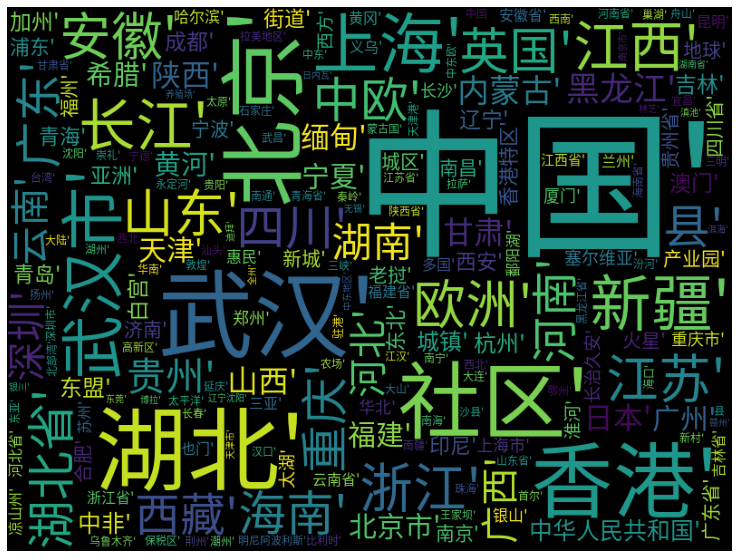

In [13]:
ex = extractor()
def extract_locs(text):
    locations = ex.extract_locations(text)
    return locations

news['locations'] = ' '
for i in range(len(news['rm_stopword'])):
    text_li = news['rm_stopword'][i]
    text_str = ''.join(str(text_li))
    news["locations"][i] = extract_locs(text_str)
news.sample(5)

In [15]:
text_li = news['rm_stopword'].tolist()
text_str = ''.join(str(text_li))
locations2020 = extract_locs(text_str)
loc_count = Counter(locations2020)
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(loc_count)
plt.imshow(img)
plt.axis('off')
plt.savefig('./locs.png')

In [14]:
with open('locations2020.pkl','wb') as f:
    pickle.dump('locations2020',f)